Episode finished after 99 time steps


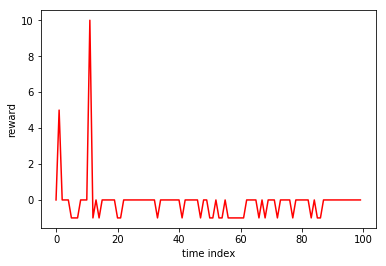

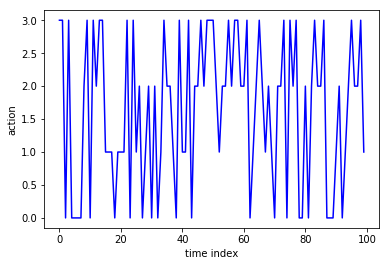

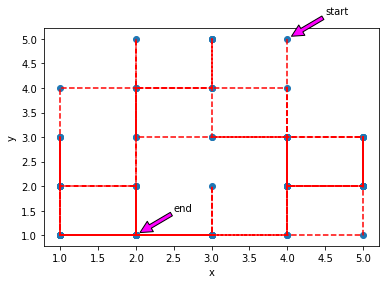

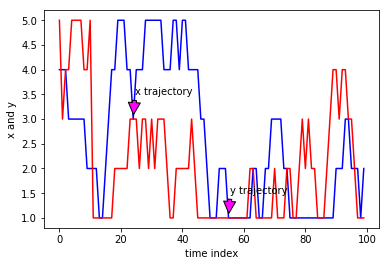

In [2]:
"""
Grid world Environment (Example 3.5 from Sutton and Barto)
"""

import gym
from gym import spaces
from gym.envs.classic_control import rendering
from gym.utils import seeding
import numpy as np
import matplotlib.pyplot as plt


class GridWorld(gym.Env):

    metadata = {
        'render.modes': ['human', 'rgb_array'],
        'video.frames_per_second': 1
    }

    # specific positions
    A_x = 2
    A_y = 5
    prime_A_x = 2
    prime_A_y = 1
    B_x = 4
    B_y = 5
    prime_B_x = 4
    prime_B_y = 3

    # boundary of grid
    x_min = 0
    x_max = 5
    y_min = 0
    y_max = 5

    action_num = 4
    grid_size = 5

    def __init__(self):
        self.action_space = spaces.Discrete(self.action_num)
        self.state_space = spaces.Discrete(self.grid_size)
        self.viewer = None
        self.agent_trans = None
        self.state = None
        self.seed()

    def step(self, a):
        state = self.state
        x, y = state
        x_old, y_old = state

        boost_mode = False

        if (x_old == self.A_x and y_old == self.A_y) or (x_old == self.B_x and y_old == self.B_y):
            boost_mode = True

        if boost_mode:
            if x_old == self.A_x and y_old == self.A_y:
                x = self.prime_A_x
                y = self.prime_A_y
                immediate_reward = +10

            if x_old == self.B_x and y_old == self.B_y:
                x = self.prime_B_x
                y = self.prime_B_y
                immediate_reward = +5

        else:
            if a == 0:
                x = x_old
                y = y_old + 1
                immediate_reward = 0.0
            elif a == 1:
                x = x_old + 1
                y = y_old
                immediate_reward = 0.0
            elif a == 2:
                x = x_old
                y = y_old - 1
                immediate_reward = 0.0
            elif a == 3:
                x = x_old - 1
                y = y_old
                immediate_reward = 0.0

            if x > 5 or x <1  or y > 5 or y < 1:
                x = x_old
                y = y_old
                immediate_reward = -1

        self.state = (x, y)
        return np.array(self.state), immediate_reward

    def seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def reset(self):
        self.state = (env.state_space.sample()+1, env.state_space.sample()+1)
        return np.array(self.state)

    def close(self):
        self.viewer.close()

    def render(self, mode='human'):
        screen_width = 500
        screen_height = 500
        scale = 100
        state = self.state
        x, y = state

        if self.viewer is None:
            self.viewer = rendering.Viewer(screen_width, screen_height)
            for i in range(6):
                line_s_x = i * scale
                line_s_y = 0 * scale
                line_e_x = i * scale
                line_e_y = 5 * scale
                line = self.viewer.draw_line((line_s_x, line_s_y), (line_e_x, line_e_y))
                self.viewer.add_geom(line)
            for i in range(6):
                line_s_y = i * scale
                line_s_x = 0 * scale
                line_e_y = i * scale
                line_e_x = 5 * scale
                line = self.viewer.draw_line((line_s_x, line_s_y), (line_e_x, line_e_y))
                self.viewer.add_geom(line)
            agent_size = 30
            left, right, top, bottom = -agent_size, +agent_size, +agent_size, -agent_size
            agent = rendering.FilledPolygon([(left, bottom), (left, top), (right, top), (right, bottom)])
            self.agent_trans = rendering.Transform()
            agent.add_attr(self.agent_trans)
            agent.set_color(1.0, 0.5, 0.5)
            self.viewer.add_geom(agent)

        if self.state is None:
            return None

        self.agent_trans.set_translation((x-0.5)*100, (y-0.5)*100)
        return self.viewer.render(return_rgb_array=mode == 'rgb_array')



env = GridWorld()
iteration_num = 1
index = 100
for i_episode in range(iteration_num):
    observation = env.reset()
    reward_vector = np.zeros(index)
    x = np.zeros(index)
    y = np.zeros(index)
    action_vector = np.zeros(index)
    T = np.zeros(index)
    for t in range(index):
        env.render()
        action = env.action_space.sample()
        observation, reward = env.step(action)
        reward_vector[t] = reward
        action_vector[t] = action
        x[t] = observation[0]
        y[t] = observation[1]
        T[t] = t
        if t == index-1:
            env.close()
            print("Episode finished after", t, "time steps")

plt.plot(T, reward_vector, 'r')
plt.ylabel('reward')
plt.xlabel('time index')
plt.show()

plt.plot(T, action_vector, 'b')
plt.ylabel('action')
plt.xlabel('time index')
plt.show()

fig = plt.subplot()
fig.scatter(x, y)
plt.plot(x, y, 'r--')
fig.annotate('start', xy=(x[0]+0.05, y[0]+0.05), xytext=(x[0]+0.5, y[0]+0.5), arrowprops=dict(facecolor='magenta', shrink=0.01),)
fig.annotate('end', xy=(x[-1]+0.05, y[-1]+0.05), xytext=(x[-1]+0.5, y[-1]+0.5), arrowprops=dict(facecolor='magenta', shrink=0.01),)
plt.ylabel('y')
plt.xlabel('x')
plt.show()

plt.plot(T, x, 'b')
plt.plot(T, y, 'r')
plt.annotate('x trajectory', xy=(T[24]+0.05, x[24]+0.05), xytext=(T[24]+0.5, x[24]+0.5), arrowprops=dict(facecolor='magenta', shrink=0.1),)
plt.annotate('y trajectory', xy=(T[55]+0.05, y[55]+0.05), xytext=(T[55]+0.5, y[55]+0.5), arrowprops=dict(facecolor='magenta', shrink=0.1),)
plt.ylabel('x and y')
plt.xlabel('time index')
plt.show()
